# Insurance Fraud Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv(r'C:\Users\Chinmay\Downloads\Automobile_insurance_fraud.csv')

In [5]:
dataset.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
dataset.replace('?', np.nan, inplace=True)

In [7]:
dataset.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

(array([0, 1, 2, 3]),
 [Text(0, 0, 'collision_type'),
  Text(1, 0, 'police_report_available'),
  Text(2, 0, 'property_damage'),
  Text(3, 0, '_c39')])

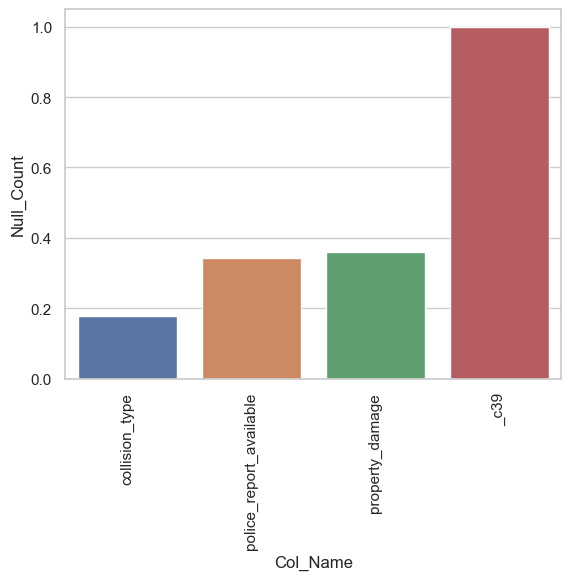

In [10]:
missing=dataset.isnull().sum()/len(dataset)
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing=missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing=missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count', data=missing)
plt.xticks(rotation=90)


In [11]:
dataset['collision_type']=dataset['collision_type'].fillna(dataset['collision_type'].mode()[0])
dataset['property_damage']=dataset['property_damage'].fillna(dataset['property_damage'].mode()[0])
dataset['police_report_available']=dataset['police_report_available'].fillna(dataset['police_report_available'].mode()[0])

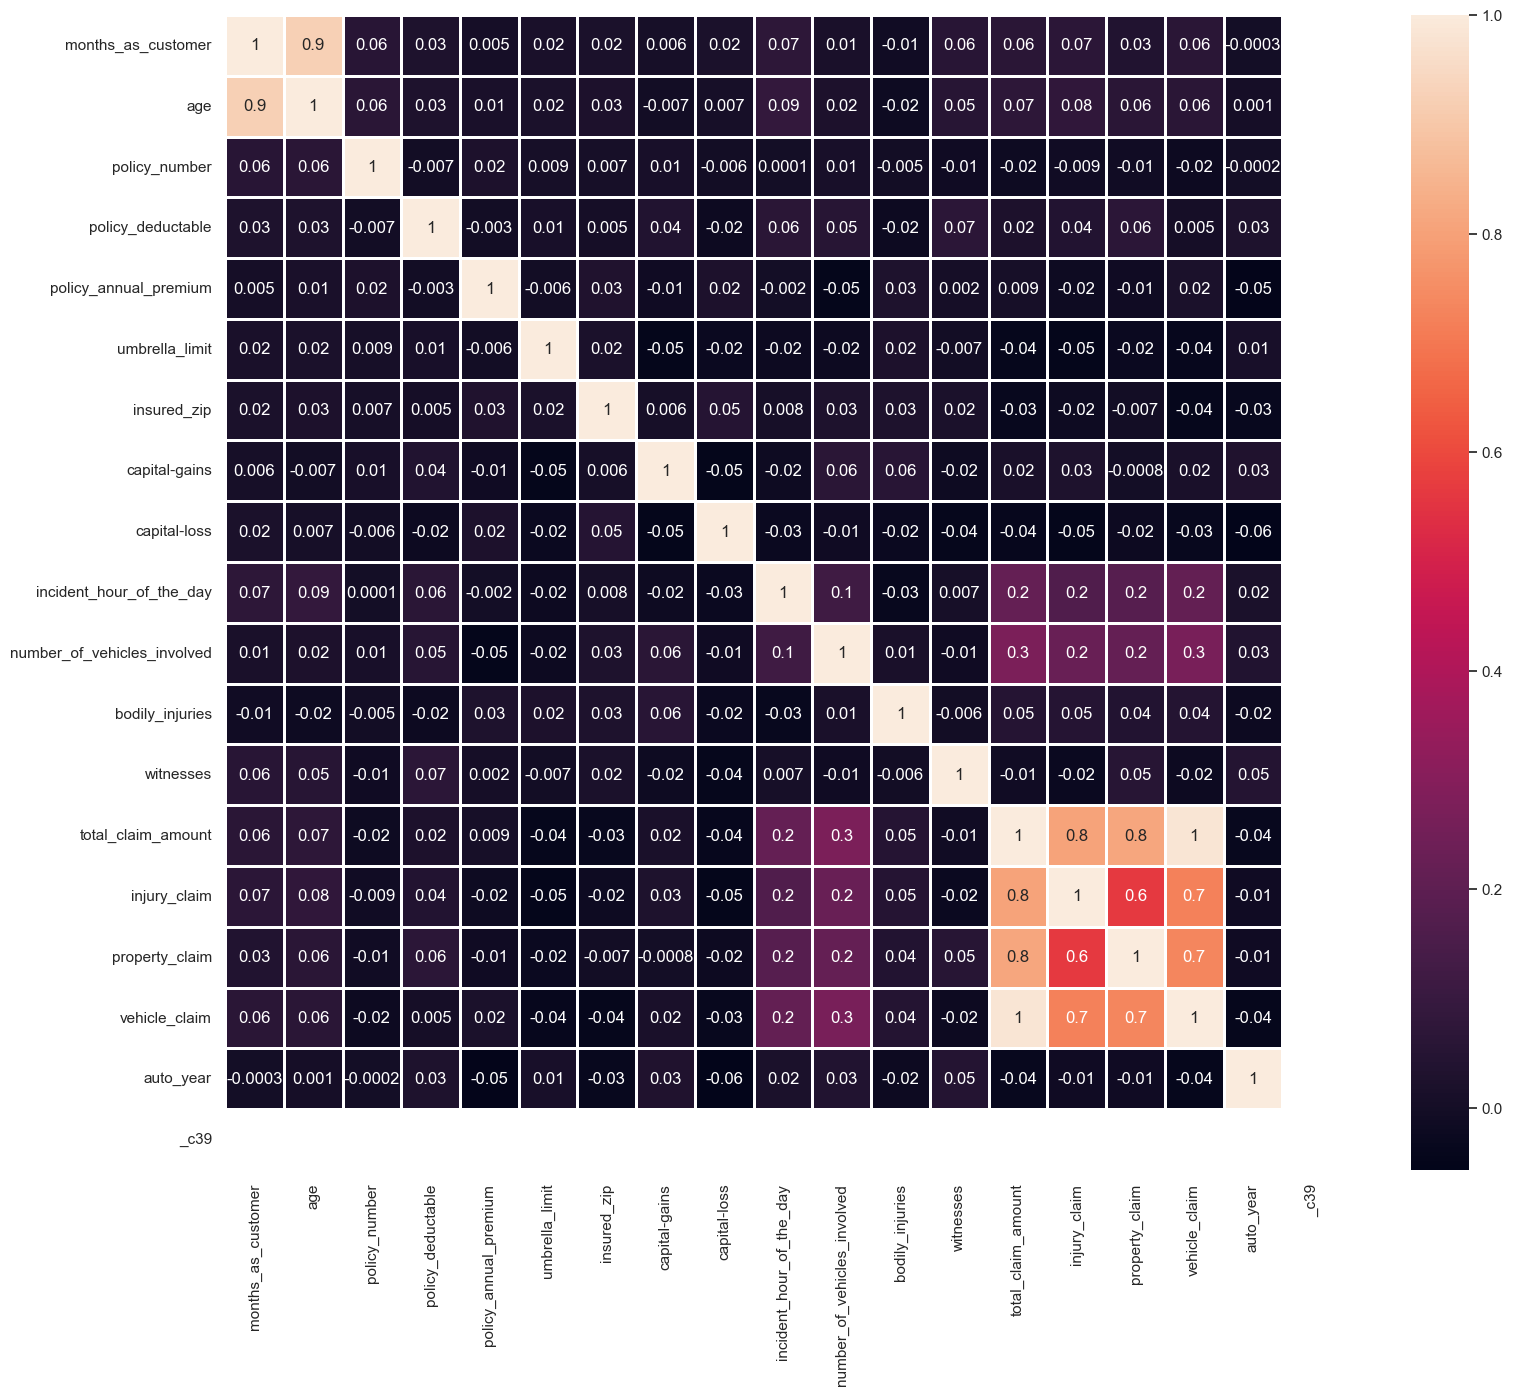

In [13]:
plt.figure(figsize=(18,15))

corr=dataset.corr()

sns.heatmap(data=corr, annot=True, fmt='0.1g', linewidth=2)
plt.show()

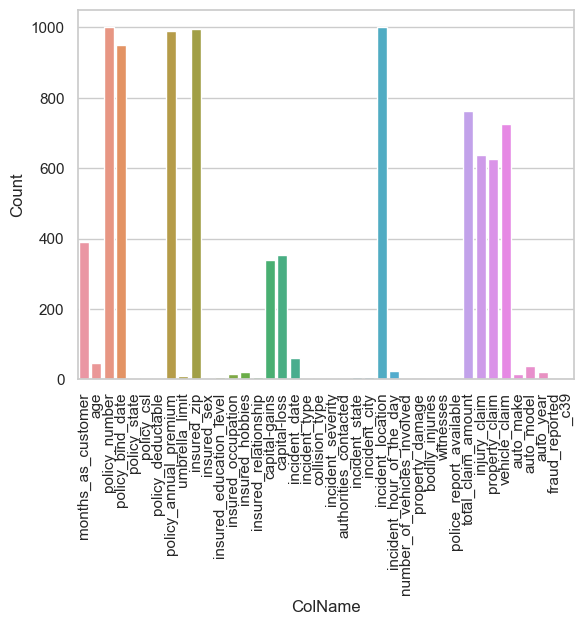

In [15]:
unique=dataset.nunique().to_frame()
unique.columns=['Count']
unique.index.names=['ColName']
unique=unique.reset_index()
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.show()

In [16]:
unique.sort_values(by='Count', ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [18]:
to_drop=['policy_number', 'policy_bind_date' , 'policy_state', 'insured_zip', 'incident_location' , 'incident_date' , 'incident_state' , 'incident_city' , 'insured_hobbies' , 'auto_make' , 'auto_model', 'auto_year' , '_c39']
dataset.drop(to_drop, inplace=True, axis=1)

In [20]:
dataset.head()

ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


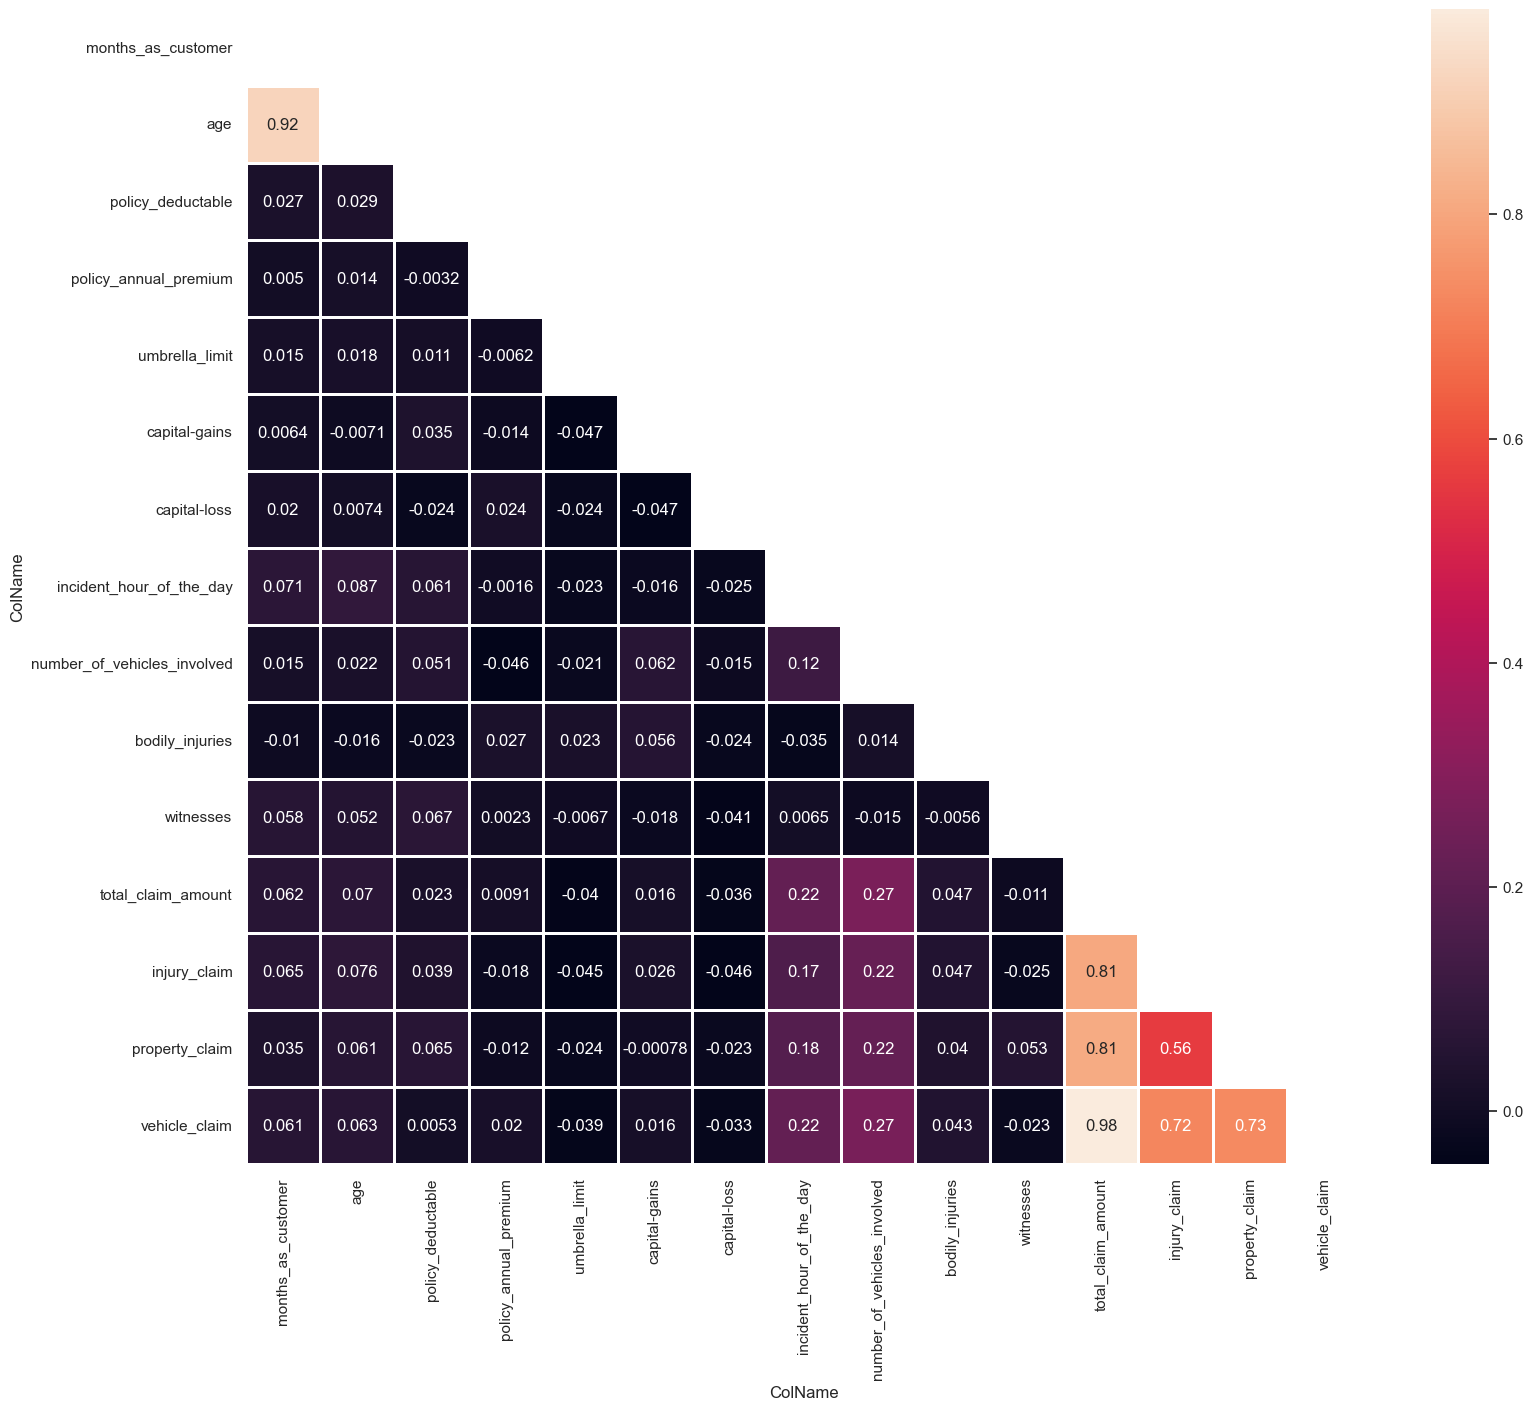

In [22]:
plt.figure(figsize=(18,15))
corr=dataset.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='0.2g', linewidth=1)
plt.show()

In [23]:
dataset.drop(columns=['age', 'total_claim_amount'], inplace=True, axis=1)


In [25]:
dataset.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [27]:
x=dataset.drop('fraud_reported' , axis=1)
y=dataset['fraud_reported']


In [29]:
categorical_cols=x.select_dtypes(include=['object'])
categorical_cols=pd.get_dummies(categorical_cols,drop_first= True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [32]:
numerical_col=x.select_dtypes(include=['int64'])
x=pd.concat([numerical_col, categorical_cols], axis=1)

In [33]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


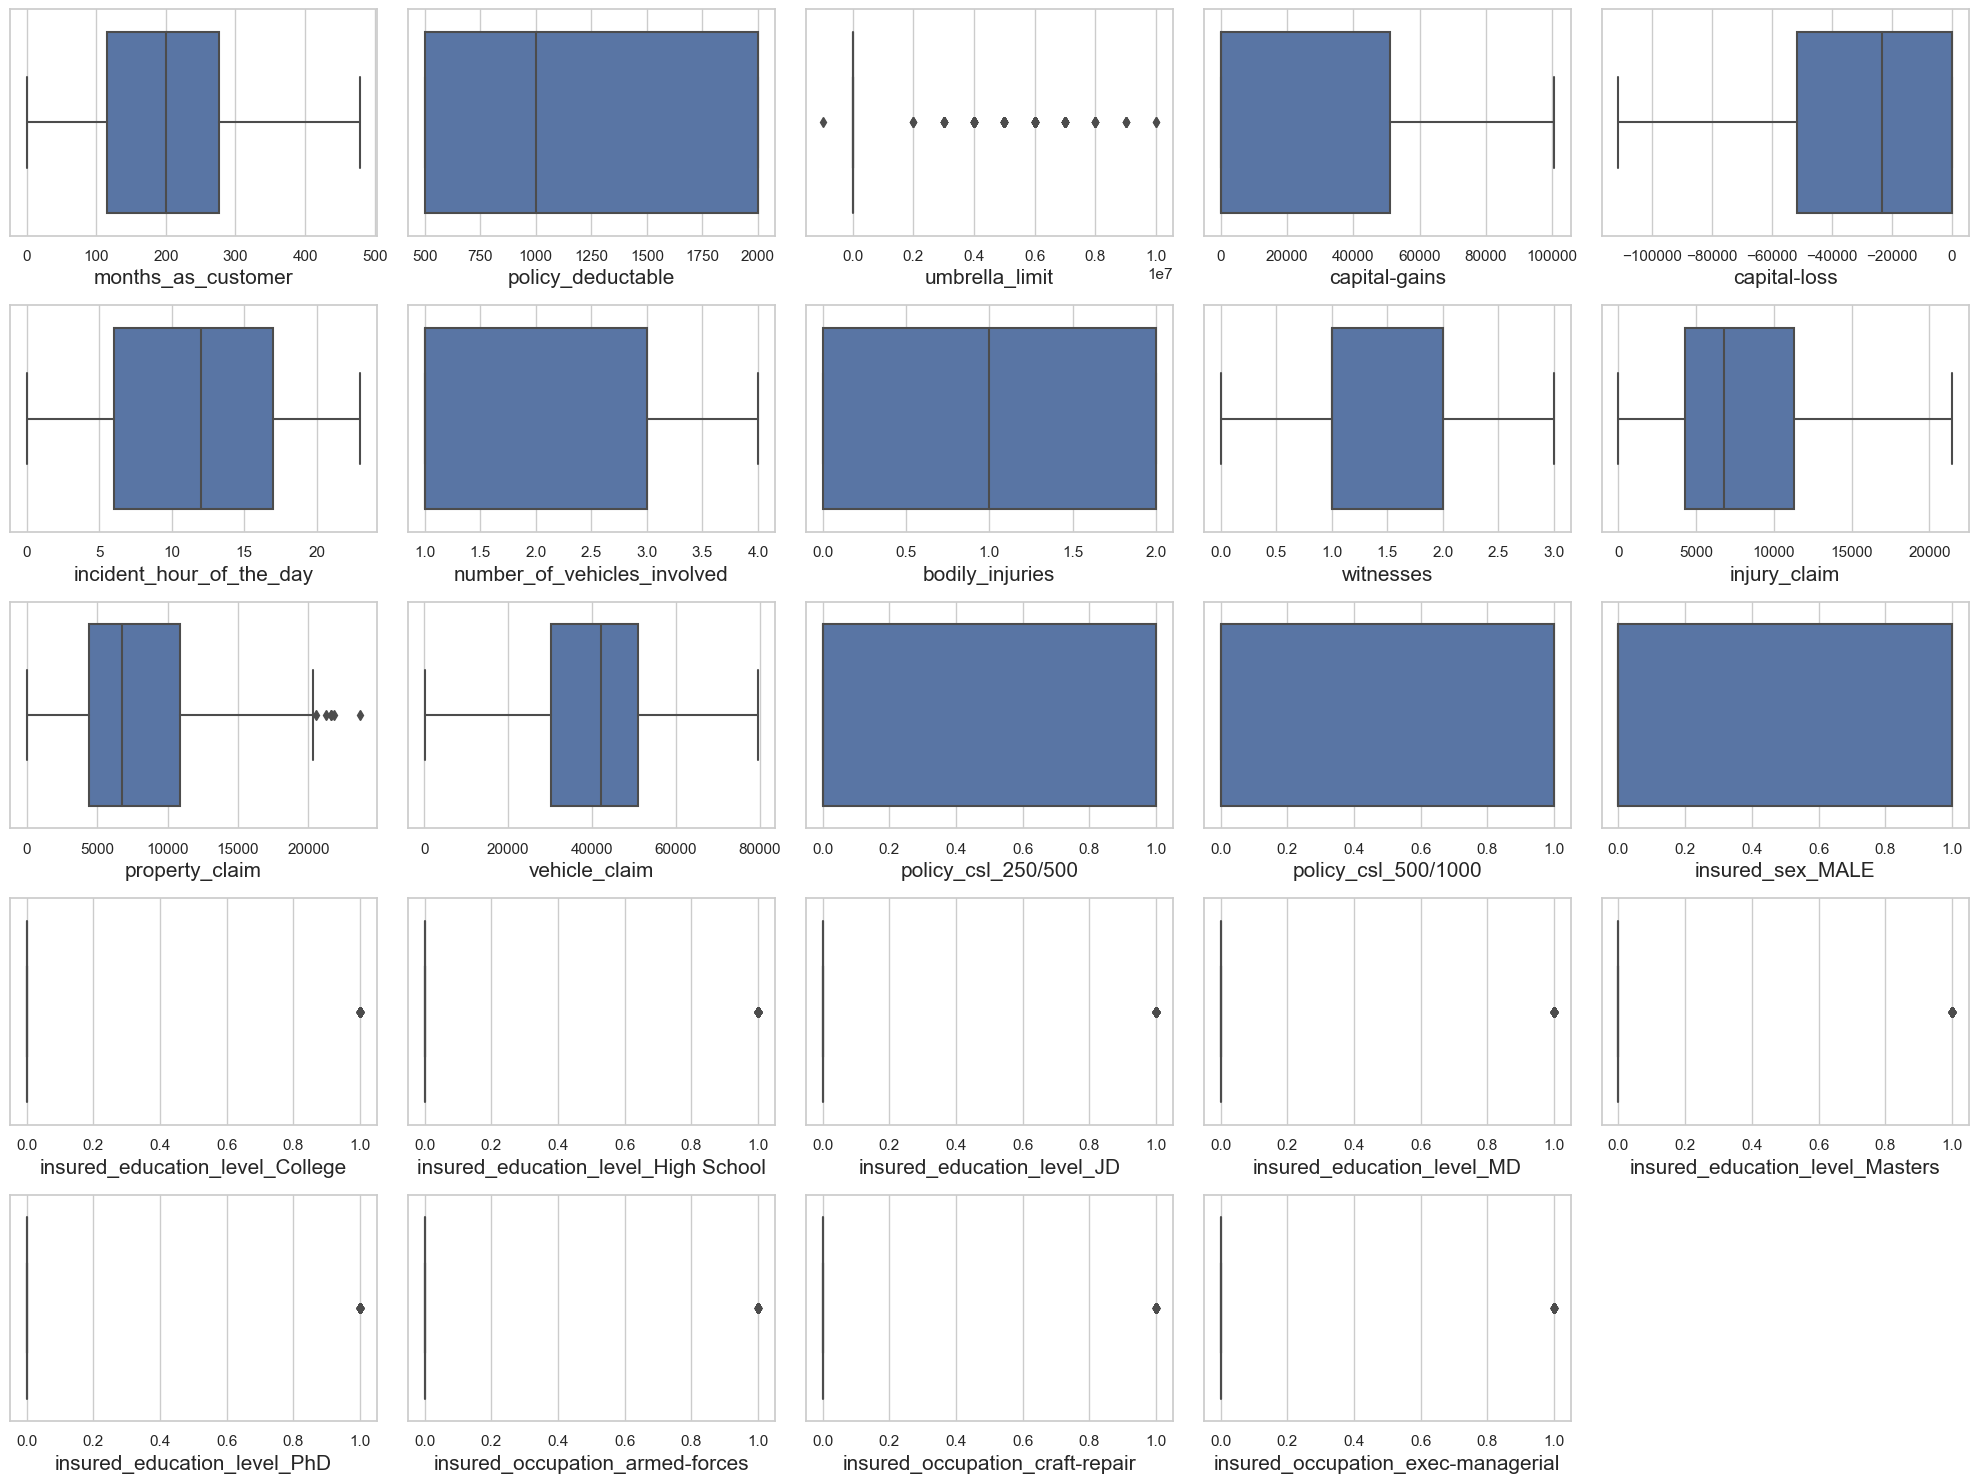

In [36]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25)

In [38]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
126,166,2000,0,59600,-32100,8,1,0,0,5760,...,1,0,1,0,0,0,1,0,0,0
289,40,1000,4000000,0,-33300,8,1,0,2,1460,...,0,1,0,0,0,0,0,1,0,0
637,292,1000,0,0,0,4,1,0,2,670,...,0,0,0,1,0,0,0,1,0,0
179,235,500,4000000,0,-31700,1,1,2,1,450,...,0,0,0,1,0,1,0,0,0,0
151,288,1000,0,0,0,4,3,2,1,10680,...,0,0,0,0,1,0,0,0,0,0


In [40]:
numerical_data=x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit', 'capital-gains' , 'capital-loss' ,'incident_hour_of_the_day' , 'number_of_vehicles_involved' , 'bodily_injuries' ,'witnesses', 'injury_claim', 'property_claim' ,'vehicle_claim']]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numerical_data)

In [42]:
scaled_num_df=pd.DataFrame(data=scaled_data, columns=numerical_data.columns, index=x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
126,-0.310810,1.402509,-0.478370,1.213690,-0.179517,-0.515340,-0.816293,-1.178247,-1.370381,-0.354855,-0.359169,-0.498096
289,-1.423663,-0.220765,1.230095,-0.926519,-0.222276,-0.515340,-0.816293,-1.178247,0.443892,-1.226014,-1.248610,-1.723685
637,0.802043,-0.220765,-0.478370,-0.926519,0.964288,-1.093508,-0.816293,-1.178247,0.443892,-1.386064,-1.273432,-1.749307
179,0.298610,-1.032402,1.230095,-0.926519,-0.165264,-1.527133,-0.816293,1.246130,-0.463244,-1.430635,-1.364445,-1.843254
151,0.766715,-0.220765,-0.478370,-0.926519,0.964288,-1.093508,1.152259,1.246130,-0.463244,0.641913,-0.446045,-0.325147


In [43]:
x_train.drop(columns=scaled_num_df.columns, inplace=True)


In [48]:
x_train.drop(columns=scaled_num_df.columns, inplace=True)



TypeError: 'bool' object is not callable